<a href="https://colab.research.google.com/github/arexdevson/Analises-Python/blob/main/Churn_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#caminho : G:\Meu Drive\Registros\Geral\B.I\Churn Classification Model\archive

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score # importando a biblioteca para calcular a acurácia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#dropamos o costumer id pq é somente um identificador


In [ ]:
dataset.drop(axis=1,columns=['customerID'],inplace=True)
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
dataset.info()

#aqui temos que ter atenção porque as colunas estão como object, objeto do python e não estão com formato adequado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#sem valores nulos no dataset

In [ ]:
#Precisamos ajustar as categorias de dados de churn para 1 ou 0, ou seja, sim ou não
dataset['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [ ]:
#segunda parte é ajustar a coluna de total charges para o formato numerico

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors = 'coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#verificando se há algum valor null ou nan no dataset em alguma (any) coluna, se eu usasse all ele só olharia todas as colunas de uma vez
dataset.isnull().any().sum()

1

In [ ]:
dataset.isnull().all().sum()

0

In [ ]:
#vai olhar as linhas e dropar a que tem o valor nulo
dataset.dropna(axis=0,inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
#dados estatisticos gerais
dataset[['tenure','MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,32.421786,64.798208
std,24.545260,30.085974
min,1.000000,18.250000
25%,9.000000,35.587500
50%,29.000000,70.350000
75%,55.000000,89.862500
max,72.000000,118.750000


In [ ]:
#correlação
dataset.corr()

<ipython-input-17-e632b05c2bd1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


In [ ]:
#transformando todas as colunas de categoria em features numericas para incluir no modelo
dataset = pd.get_dummies(dataset)
dataset = dataset.reset_index()

In [ ]:
dataset.drop(axis=1,columns=['index'],inplace=True)
dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7028,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7029,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7030,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
#SEPARANDO DADOS PARA O MODELO DE CLASSIFICAÇÃO
x = dataset.drop('Churn',axis=1)
y = dataset['Churn']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [ ]:
model_eval = pd.DataFrame(index=['RandomForest'],columns=['Score'])

In [ ]:
#startando os modelos de classificação / regressão


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)

In [ ]:
LG = LogisticRegression()
LG.fit(x_train,y_train)
ypred2 = LG.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
XG = XGBClassifier()
XG.fit(x_train,y_train)
ypred3 = XG.predict(x_test)

In [ ]:
#alocando resultados em dataset

In [ ]:
#index random, na coluna score ele colocou o score da random forest no df criado acima
#index logistic regression, na coluna score ele colocou o score do modelo
model_eval.loc['RandomForest','Score'] = accuracy_score(ypred,y_test)
model_eval.loc['LogisticRegression','Score'] = accuracy_score(ypred2,y_test)
model_eval.loc['XGB','Score'] = accuracy_score(ypred3,y_test)
model_eval.reset_index(inplace=True)

In [ ]:
model_eval

,index,Score
0,RandomForest,0.778157
1,LogisticRegression,0.802617
2,XGB,0.782708


In [ ]:
#importancia de cada coluna para a análise da classificação
importance = rf.feature_importances_

In [ ]:
weights = pd.DataFrame(rf.feature_importances_,index=x.columns.values,columns=['Features']).sort_values(by='Features',ascending=False).reset_index()

In [ ]:
weights


,index,Features
0,TotalCharges,0.157144
1,tenure,0.140981
2,MonthlyCharges,0.137066
3,Contract_Month-to-month,0.058797
4,TechSupport_No,0.037102
5,PaymentMethod_Electronic check,0.027801
6,OnlineSecurity_No,0.026783
7,SeniorCitizen,0.019054
8,InternetService_Fiber optic,0.018420
9,gender_Male,0.018366


# Conceitos:
1. VP = Verdadeiros Positivos
Aqueles que cancelaram e foram classificados como cancelados ( 1 horizontal e 1 vertical)
2. VN = Verdadeiros Negativos
Aqueles que não cancelaram e foram classificados como não cancelados (0 horizontal e 0 vertical)
3. FP = Falso Positivos
Aqueles que não cancelaram e foram classificados como cancelados ( 0 horizontal e 1 vertical)
4. FN = Falso Negativo
Aqueles que cancelaram e foram classificados como não cancelados ( 1 horizontal e 0 vertical)

In [ ]:

print (pd.crosstab(y_test,ypred2, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1151  129  1280
1         218  260   478
All      1369  389  1758


In [ ]:
# Acurácia
#A Acurácia é a média global do acerto do modelo ao classificar as classes, pode ser calculada através da razão (VN+VP)/(VP+FN+VN+FP).
acuracia = accuracy_score(y_test, ypred2)
print('Acurácia: %f' % acuracia)

Acurácia: 0.802617


In [ ]:
# Precision
#Precision a métrica que traz a informação de quantas observações o modelo classificou corretamente como 1.
precision = precision_score(y_test, ypred2)
print('Precision: %f' % precision)


Precision: 0.668380


In [ ]:
# Recall
#Recall analisa entre todos os cancelados, quantos realmente o modelo conseguiu prever como cancelado.
recall = recall_score(y_test, ypred2)
print('Recall: %f' % recall)


Recall: 0.543933


In [ ]:
# F1-Score
#A F1-Score é a média harmônica entre o Recall e Precision, ou seja, ela resume as informações dessas duas métricas.
f1 = f1_score(y_test, ypred2)
print('F1-Score: %f' % f1)


F1-Score: 0.599769


In [ ]:
!pip install knn

  Preparing metadata (setup.py) ... done
  Created wheel for knn: filename=KNN-1.0.0-py3-none-any.whl size=3110 sha256=2c19c909d3ca42995d89f5ed8513c7e1aa7879c03b9b6788f5a6f3fc5c306344
  Stored in directory: /root/.cache/pip/wheels/db/f0/9c/9da3fdf7ad3d19587a688434d71dbf38ced30bde9fb2975ff7
Successfully built knn


In [ ]:
#plotando a curva ROC
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color="red", label="ROC")
    plt.plot([0, 1], [0, 1], color="green", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()


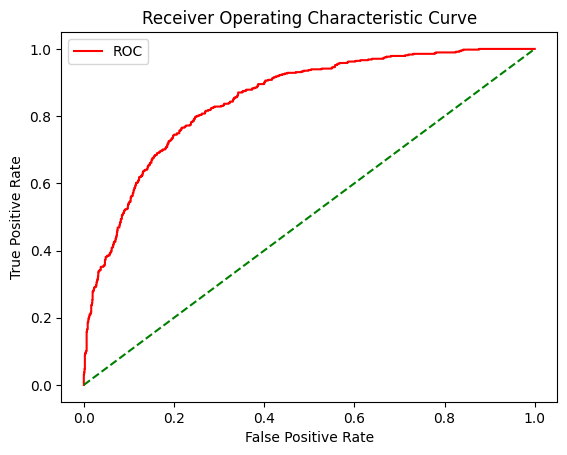

In [ ]:

prob = LG.predict_proba(x_test) # predizendo a probabilidade de cada
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)
